### MLP 4: Classification

#### Write your name

- xiaomei Xie
- Lili Hao


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import KFold

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../processeddata/new_airlines_Normalized.csv')
df.head(2)

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,...,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Time.Month.level,Rate,Ratio_Rank
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,0.301513,0.270412,0.350472,0.189474,...,0.770892,0.258823,0.185741,0.194317,0.104668,0.260628,0.253219,3.0,0.797538,2.0
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,0.088067,0.093018,0.069295,0.042105,...,0.199003,0.066594,0.067780,0.037010,0.020004,0.064041,0.053621,3.0,0.816993,1.0


In [3]:
col = ['# of Delays.Carrier', "Time.Month",
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather']

In [4]:
normalizedData = df[col]
normalizedData.shape
# of fligth on time 

(4408, 17)

In [5]:
Xcol = ['# of Delays.Carrier', "Time.Month",
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
        'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Weather']

In [6]:
X = normalizedData[Xcol]
print(X.shape)
X.head()

(4408, 11)


,# of Delays.Carrier,Time.Month,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,# of Delays.Weather,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Weather
0,0.301513,6,0.270412,0.350472,0.189474,0.403206,0.258823,0.185741,0.194317,0.104668,0.253219
1,0.088067,6,0.093018,0.069295,0.042105,0.080148,0.066594,0.067780,0.037010,0.020004,0.053621
2,0.061849,6,0.088924,0.036424,0.094737,0.094945,0.035474,0.063728,0.025609,0.056173,0.080223
3,0.063193,6,0.087787,0.074847,0.031579,0.065351,0.040725,0.053647,0.036017,0.025662,0.048824
4,0.057479,6,0.041392,0.047307,0.052632,0.070284,0.036125,0.025243,0.031345,0.024247,0.053373


In [7]:
y = normalizedData["Flights.On Time"]
y.head()

0    0.745664
1    0.199287
2    0.169523
3    0.170304
4    0.112608
Name: Flights.On Time, dtype: float64

In [8]:
X = X.to_numpy()
print(type(X))

y = y.to_numpy()
#print(type(y))
y

<class 'numpy.ndarray'>


array([0.74566435, 0.19928729, 0.16952316, ..., 0.23448159, 0.18404887,
       0.09316138])

In [9]:
y = y.T
#print(type(y))
y

array([0.74566435, 0.19928729, 0.16952316, ..., 0.23448159, 0.18404887,
       0.09316138])

In [10]:
print(X.shape)

(4408, 11)


In [11]:
X = np.c_[np.ones((4408, 1)), X] 

In [12]:
print(X.shape)

(4408, 12)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Linear regression using batch gradient descent

- read pp. 118 - 122 of A. Geron textbook

<img src="images/gd.png" width=300>
<img src="images/cost.png" width=300>

### (2) Multivariate linear regression model with batch gradient descent

In [14]:
def batch_Gradient_Descent(alpha):
    # learning rate
    print("alpha=============,", alpha)
    #alpha = 0.0001
    #alpha = 0.0002

    # number of iterations
    #n_iter = 2000
    n_iter = 200

    # the number of data points
    n = 12
    theta = np.random.randn(12, 1)

    preCost = sys.maxsize
    bestCost = preCost

    preTheta = np.random.randn(12, 1)
    bestTheta = preTheta

    changeCost = bestCost

    # the process of gradient descent
    for iteration in range(n_iter):
        gradients = (1/n) * X_train.T.dot(X_train.dot(theta) - np.vstack(y_train))
        theta = theta - alpha*gradients

        cost = (X_train.dot(theta) - np.vstack(y_train)).T.dot(X_train.dot(theta) - np.vstack(y_train))[0][0] * (1/(2*n))
        if preCost-cost>0:
            bestCost = cost
            bestTheta = theta
            changeCost = preCost-cost
            #print(preCost-cost)
        else:
            break
            #print(preCost-cost)

        preCost = cost
        preTheta = theta    
    print("bestCost:",bestCost)
    #print(bestTheta)
    print("preCost-cost:",changeCost)

    theta = bestTheta
    #print('best theta: \n', theta)

    y_train_predict = X_train.dot(theta)
    train_error = np.sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    print('training RMSE: {:.3f}'.format(train_error))

    y_test_predict = X_test.dot(theta)
    test_error = np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    print('testing RMSE: {:.3f}\n'.format(test_error))
    
    return train_error, test_error

#### alpah

In [15]:
alpha_sizes = [0.00001,0.0000125, 0.000015, 0.0000175, 0.00002, 0.000025,0.000030,0.000035, 0.000040,0.000045, \
               0.00005, 0.000075,0.0001,0.000125, 0.00015]#, 0.000175, 0.0002, 0.0005, 0.00075, 0.001]
train_errors = []
test_errors = []

for alpha in alpha_sizes:
    train_error, test_error= batch_Gradient_Descent(alpha)
    print(train_error, test_error)
    train_errors.append(train_error)
    test_errors.append(test_error)

alpha=============, 1e-05
bestCost: 6.52786576309466
preCost-cost: 0.0013329733858826742
training RMSE: 0.225
testing RMSE: 0.221

0.2253531558120452 0.221348141150735
alpha=============, 1.25e-05
bestCost: 29.762885367945604
preCost-cost: 0.0100171019385904
training RMSE: 0.481
testing RMSE: 0.457

0.48118884678058305 0.45650902552013417
alpha=============, 1.5e-05
bestCost: 21.716595252409434
preCost-cost: 0.03314170239301717
training RMSE: 0.411
testing RMSE: 0.397

0.41103036362810824 0.3969777076653312
alpha=============, 1.75e-05
bestCost: 23.688855762532945
preCost-cost: 0.039923691977673315
training RMSE: 0.429
testing RMSE: 0.442

0.4292893144425839 0.4415122245490701
alpha=============, 2e-05
bestCost: 3.393457952825024
preCost-cost: 0.0006660347433724567
training RMSE: 0.162
testing RMSE: 0.156

0.1624797614803059 0.15567902960870225
alpha=============, 2.5e-05
bestCost: 55.10902685550165
preCost-cost: 0.13469093785209196
training RMSE: 0.655
testing RMSE: 0.638

0.654770957

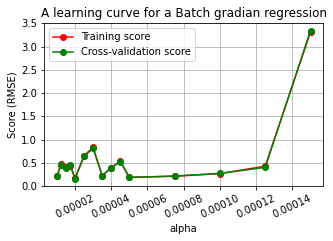

In [16]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.set_title('A learning curve for a Batch gradian regression')
ax.set_xlabel("alpha")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(alpha_sizes, train_errors, 'o-', color="r", label="Training score")
ax.plot(alpha_sizes, test_errors, 'o-', color="g", label="Cross-validation score")
for tick in ax.get_xticklabels(): 
    tick.set_rotation(25) 
ax.legend(loc="best")

plt.show()

#### theta

In [17]:
# learning rate
#alpha = 0.0000125
alpha = 0.0001
#alpha = 0.0002

# number of iterations
n_iter = 10000
#n_iter = 100

# the number of data points
n = 12
theta = np.random.randn(12, 1)
#theta = bestTheta

preCost = sys.maxsize
bestCost = preCost

preTheta = np.random.randn(12, 1)
bestTheta = preTheta

changeCost = bestCost

# the process of gradient descent
for iteration in range(n_iter):
    gradients = (1/n) * X_train.T.dot(X_train.dot(theta) - np.vstack(y_train))
    theta = theta - alpha*gradients

    cost = (X_train.dot(theta) - np.vstack(y_train)).T.dot(X_train.dot(theta) - np.vstack(y_train))[0][0] * (1/(2*n))
    if preCost-cost>0:
        bestCost = cost
        bestTheta = theta
        changeCost = preCost-cost
        #print(preCost-cost)
    else:
        break
        #print(preCost-cost)

    preCost = cost
    preTheta = theta    
print("bestCost:",bestCost)
print(bestTheta)
print("preCost-cost:",changeCost)

theta = bestTheta
#print('best theta: \n', theta)

y_train_predict = X_train.dot(theta)
train_error = np.sqrt(metrics.mean_squared_error(y_train, y_train_predict))
print('training RMSE: {:.3f}'.format(train_error))

y_test_predict = X_test.dot(theta)
test_error = np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))
print('testing RMSE: {:.3f}\n'.format(test_error))

bestCost: 2.032170032059929
[[ 3.49664889e-02]
 [ 1.91237257e+00]
 [ 8.14587329e-04]
 [ 2.70033917e-01]
 [ 1.97757452e-01]
 [-3.08291353e-01]
 [-8.93738157e-01]
 [-4.61443385e-01]
 [-9.95146710e-02]
 [ 3.34436817e-01]
 [ 7.90231747e-03]
 [ 3.71928463e-02]]
preCost-cost: 4.34603383712151e-05
training RMSE: 0.126
testing RMSE: 0.130



In [18]:
import numpy
def rsq(actual, predict):
    corr_matrix = numpy.corrcoef(actual, predict)
    corr = corr_matrix[0,1]
    R_sq = corr**2

    #print(R_sq)
    return R_sq

In [19]:
theta = bestTheta
#print('best theta: \n', theta)

train_score = rsq(y_train, np.hstack(y_train_predict))
print('training R squared: {:.3f}'.format(train_score))

y_train_predict = X_train.dot(theta)
train_error = np.sqrt(metrics.mean_squared_error(y_train, y_train_predict))
#print(np.hstack(y_train_predict))
print('training RMSE: {:.3f}'.format(train_error))

test_score = rsq(y_test, np.hstack(y_test_predict))
print('testing R squared: {:.3f}'.format(test_score))

y_test_predict = X_test.dot(theta)
test_error = np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))
#print(np.hstack(y_test_predict))
print('testing RMSE: {:.3f}\n'.format(test_error))




training R squared: 0.548
training RMSE: 0.126
testing R squared: 0.480
testing RMSE: 0.130



#### trainin test splits

In [35]:
theta = bestTheta

train_errors = []
test_errors = []

train_sizes = np.linspace(0.1, 0.90, 10)

for train_size in train_sizes:
    # random initialization to theta. 
    # Return samples (11 values for theta0 and theta1) from the “standard normal” distribution.
    test_size = 1 - train_size
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    print("test_size = : ", test_size)

    y_train_predict = X_train.dot(theta)
    train_error = np.sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    print('training RMSE: {:.3f}'.format(train_error))
    train_errors.append(np.sqrt(train_error))

    y_test_predict = X_test.dot(theta)
    test_error = np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    print('testing RMSE: {:.3f}\n'.format(test_error))
    test_errors.append(np.sqrt(test_error))

test_size = :  0.9
training RMSE: 0.114
testing RMSE: 0.128

test_size = :  0.8111111111111111
training RMSE: 0.121
testing RMSE: 0.128

test_size = :  0.7222222222222222
training RMSE: 0.122
testing RMSE: 0.129

test_size = :  0.6333333333333333
training RMSE: 0.128
testing RMSE: 0.126

test_size = :  0.5444444444444444
training RMSE: 0.125
testing RMSE: 0.129

test_size = :  0.4555555555555555
training RMSE: 0.122
testing RMSE: 0.133

test_size = :  0.3666666666666667
training RMSE: 0.129
testing RMSE: 0.124

test_size = :  0.2777777777777778
training RMSE: 0.124
testing RMSE: 0.134

test_size = :  0.18888888888888888
training RMSE: 0.126
testing RMSE: 0.133

test_size = :  0.09999999999999998
training RMSE: 0.127
testing RMSE: 0.131



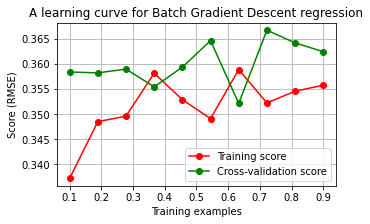

In [36]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for Batch Gradient Descent regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_errors, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_errors, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

#### bar chart for best theta

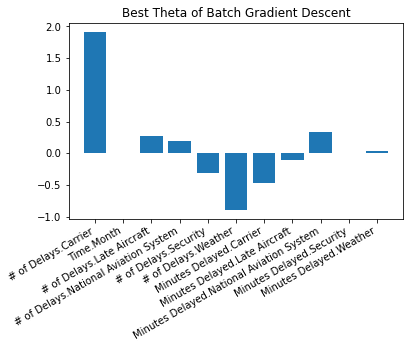

In [37]:
np.hstack(theta)[1:]
fig = plt.figure()
plt.bar(normalizedData[Xcol].columns, np.hstack(theta)[1:], width=0.8, bottom=None, align='center')
plt.title("Best Theta of Batch Gradient Descent")
fig.autofmt_xdate()